In [18]:
import os
import re
import pandas as pd
import numpy as np

import plotly
import plotly.plotly as py
from plotly.graph_objs import *

plotly.tools.set_credentials_file(username='theano', api_key='hkYRYxjyM0aAGA5nmGq1')

In [19]:
import matplotlib.pyplot as plt

import matplotlib
matplotlib.style.use('ggplot')

In [20]:
home = os.getcwd()
print(home)

/home/theano/mountpoint/tsch/mininetpipe


In [21]:
results_dir = os.path.join(home, "results")

In [116]:
tcp_tput_fname = os.path.join(results_dir, "throughput", "tcp.txt")
udp_tput_fname = os.path.join(results_dir, "throughput", "udp.txt")

In [127]:
def load_datfile(fpath, proto):
    # Returns a dataframe
    df = pd.read_csv(fpath, 
                     index_col=False,
                     names=["ncli",proto])
    return df

In [128]:
df_tcp = load_datfile(tcp_tput_fname, "TCP")
gp_tcp = df_tcp.groupby("ncli")

In [150]:
df_udp = load_datfile(udp_tput_fname, "UDP")
gp_udp = df_udp.groupby("ncli")

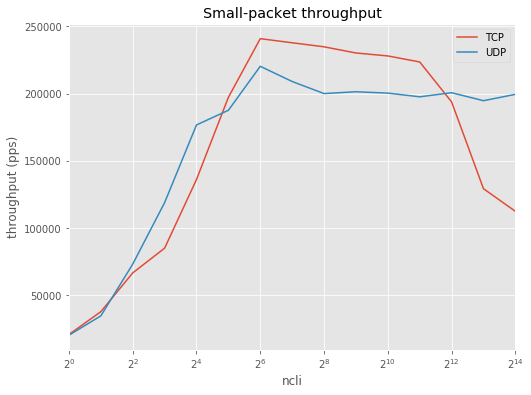

In [151]:
fig, ax = plt.subplots(figsize=(8,6))

ax.title.set_text("Small-packet throughput")

ax.set_xlabel("# clients")
ax.set_ylabel("throughput (pps)")

ax.set_xscale('log', basex=2)
#ax.set_yscale('log', basey=10)

gp_tcp.mean().plot(ax=ax)
gp_udp.mean().plot(ax=ax)

plt.show()

In [154]:
fig = {
    'data': [
        {
            'x': gp.mean().index,
            'y': gp.mean()[gp.mean().columns[0]],
            'name': gp.mean().columns[0],
        } for gp in [gp_tcp, gp_udp]
    ],
    'layout': {
        'xaxis': {'title': '# clients', 'type': 'log'},
        'yaxis': {'title': 'throughput (pps)', 'type': 'log'},
        'title': 'Small-packet throughput'
    }
}

py.plot(fig, filename="somefilename")

'https://plot.ly/~theano/18'

In [148]:
gp_tcp.groups

{1: Int64Index([0, 1, 2], dtype='int64'),
 2: Int64Index([3, 4, 5], dtype='int64'),
 4: Int64Index([6, 7, 8], dtype='int64'),
 8: Int64Index([9, 10, 11], dtype='int64'),
 16: Int64Index([12, 13, 14], dtype='int64'),
 32: Int64Index([15, 16, 17], dtype='int64'),
 64: Int64Index([18, 19, 20], dtype='int64'),
 128: Int64Index([21, 22, 23], dtype='int64'),
 256: Int64Index([24, 25, 26], dtype='int64'),
 512: Int64Index([27, 28, 29], dtype='int64'),
 1024: Int64Index([30, 31, 32, 33], dtype='int64'),
 2048: Int64Index([34, 35, 36], dtype='int64'),
 4096: Int64Index([37, 38, 39], dtype='int64'),
 8192: Int64Index([40, 41, 42], dtype='int64'),
 16384: Int64Index([43, 44, 45, 46], dtype='int64')}